In [83]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx

In [228]:
total_rows = 10000
date = pd.read_csv('data/train_date.csv.zip', index_col=0, nrows=total_rows)
date.dropna(axis=0, how='all', inplace=True)
date.dropna(axis=1, how='all', inplace=True)
response = pd.read_csv('data/train_numeric.csv.zip', index_col=0, 
                       usecols=[0, 969], nrows=total_rows)

In [229]:
new_columns = pd.MultiIndex.from_tuples([tuple([int(a[1:]) 
                                          for a in x[3:].split('_')])
                                          for x in date.columns], 
                                          names=['station', 'feature'])
date.columns = new_columns

In [230]:
stations = sorted([x for x in date.columns.levels[0]])

In [231]:
date_station0 = pd.DataFrame({i: date[i].apply(min, axis=1) 
                            for i in stations})

In [232]:
response_p = response.Response.apply(lambda x: 'p' if x==1 else np.nan)
response_n = response.Response.apply(lambda x: 'n' if x==0 else np.nan)

In [233]:
date_station0['p'] = response_p
date_station0['n'] = response_n

In [339]:
neg_idx = date_station0[date_station0.n=='n'].index
pos_idx = date_station0[date_station0.p=='p'].index

In [253]:
date_station1 = date_station0.copy()
# date_station1.n = date_station1.n.apply(lambda x: 1 if x=='n' else 0)
# date_station1.p = date_station1.p.apply(lambda x: 1 if x=='p' else 0)

node_weights = date_station1[date_station1.p=='p'].notna().sum(axis=0)/date_station1.notna().sum(axis=0)
node_weights = node_weights.to_dict()

In [255]:
date_station = date_station0.apply(lambda x: x.dropna().index.tolist(), axis=1)

In [341]:
date_station_list = date_station.apply(lambda x: [(x[i], x[i+1]) for i in range(len(x)-1)]).values.tolist()
date_station_list_pos = date_station.loc[pos_idx].apply(lambda x: [(x[i], x[i+1]) for i in range(len(x)-1)]).values.tolist()
date_station_list_neg = date_station.loc[neg_idx].apply(lambda x: [(x[i], x[i+1]) for i in range(len(x)-1)]).values.tolist()

In [342]:
date_station_list = [x for a in date_station_list for x in a]
date_station_list_pos = [x for a in date_station_list_pos for x in a]
date_station_list_neg = [x for a in date_station_list_neg for x in a]

In [346]:
date_station_list = pd.Series(date_station_list)
date_station_list_pos = pd.Series(date_station_list_pos)
date_station_list_neg = pd.Series(date_station_list_neg)

In [259]:
edges = date_station_list.value_counts().to_dict()

In [347]:
edges_pos = date_station_list_pos.value_counts().to_dict()
edges_neg = date_station_list_neg.value_counts().to_dict()

In [349]:
edges_pos_rate = {k: edges_pos[k]/edges[k] for k in edges_pos.keys()}

In [260]:
stations.extend(['n', 'p'])

In [261]:
G = nx.Graph()
G.add_nodes_from(stations)
G.add_edges_from(edges.keys())

In [307]:
pos = nx.spring_layout(G)
for n, p in pos.items():
    G.node[n]['pos'] = p
G.node[0]['pos'] = [0, 1]
G.node[1]['pos'] = [1, 1]
G.node[2]['pos'] = [2, 2]
G.node[3]['pos'] = [2, 0]
G.node[4]['pos'] = [3, 2]
G.node[5]['pos'] = [3, 0]
G.node[6]['pos'] = [4, 2]
G.node[7]['pos'] = [4, 0]
G.node[8]['pos'] = [5, 1]
G.node[9]['pos'] = [6, 2.5]
G.node[10]['pos'] = [6, 1]
G.node[11]['pos'] = [6, -0.5]

G.node[12]['pos'] = [0, -3]
G.node[13]['pos'] = [1, -3]
G.node[14]['pos'] = [2, -2]
G.node[15]['pos'] = [2, -4]
G.node[16]['pos'] = [3, -2]
G.node[17]['pos'] = [3, -4]
G.node[18]['pos'] = [4, -2]
G.node[19]['pos'] = [4, -4]
G.node[20]['pos'] = [5, -3]
G.node[21]['pos'] = [6, -1.5]
G.node[22]['pos'] = [6, -3]
G.node[23]['pos'] = [6, -4.5]

G.node[24]['pos'] = [5, -6]
G.node[25]['pos'] = [5, -7]
G.node[26]['pos'] = [7, -6]
G.node[27]['pos'] = [7, -7]
G.node[28]['pos'] = [7, -8]


G.node[29]['pos'] = [8, -1]
G.node[30]['pos'] = [9, -1]
G.node[31]['pos'] = [10, -2.5]
G.node[32]['pos'] = [11, 0]
G.node[33]['pos'] = [11, -2]
G.node[34]['pos'] = [12, -2]
G.node[35]['pos'] = [13, 0]
G.node[36]['pos'] = [13, -2]
G.node[37]['pos'] = [14, -1]
G.node[38]['pos'] = [15, -1]

G.node[39]['pos'] = [8, -4]
G.node[40]['pos'] = [9, -4]
G.node[41]['pos'] = [10, -4]
G.node[43]['pos'] = [11, -3]
G.node[44]['pos'] = [11, -5]
G.node[45]['pos'] = [12, -4]
G.node[47]['pos'] = [13, -4]
G.node[48]['pos'] = [14, -4]
G.node[49]['pos'] = [15, -3]
G.node[50]['pos'] = [15, -5]
G.node[51]['pos'] = [16, -4]

G.node['n']['pos'] = [18, 1]
G.node['p']['pos'] = [18, -4]

In [308]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    line=dict(width=1,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]
    edge_trace['text'].append(edges[edge]/total_rows)

node_trace = go.Scatter(
x=[],
y=[],
text=[],
hovertext=[],
mode='markers+text',
hoverinfo='hovertext',
textposition='bottom',
marker=dict(
    showscale=False,
    # colorscale options
    # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
    # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
    colorscale='YIGnBu',
    reversescale=True,
    color=[],
    size=10,
#     colorbar=dict(
#         thickness=15,
#         title='Node Connections',
#         xanchor='left',
#         titleside='right'
#     ),
    line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    node_trace['text'].append(node)
    node_trace['hovertext'].append(node_weights[node])


In [309]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Bosch Production Line',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lygirona/0 or inside your plot.ly account where it is named 'networkx'


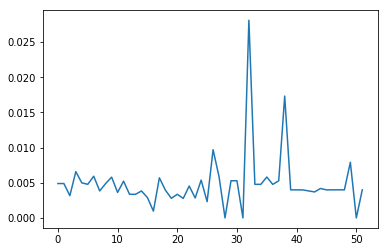

In [295]:
import matplotlib.pyplot as plt

%matplotlib inline 

plt.plot(node_weights.index[:-2], node_weights.values[:-2])

In [304]:
trace1 = go.Scatter(
    x = node_weights.index[:-2],
    y = node_weights.values[:-2]
)

trace2 = go.Scatter(
    x = node_weights.index[:-2],
    y = np.median(node_weights.values[:-2])*np.ones(52)
)

py.iplot([trace1, trace2])

In [390]:
a = sorted(edges_pos_rate.items(), key=lambda x: x[1], reverse=True)

In [400]:
trace_pos_rate = go.Scatter(
    x = [],
    y = [], 
    text = edge_name,
    mode='lines',
    hovertext=[],
    hoverinfo='hovertext'
)

for n, x in enumerate(a):
    if n>2:
        trace_pos_rate['x'].append(n)
        trace_pos_rate['y'].append(x[1])
        trace_pos_rate['hovertext'].append(x[0].__str__())
        
trace_median = go.Scatter(
    x = [],
    y = [], 
)

for n, x in enumerate(a):
    if n>2:
        trace_pos_rate['x'].append(n)
        trace_pos_rate['y'].append(x[1])
        trace_pos_rate['hovertext'].append(x[0].__str__())

py.iplot([trace_pos_rate])

In [401]:
a

[((37, 'p'), 1.0),
 ((38, 'p'), 1.0),
 ((51, 'p'), 1.0),
 ((32, 35), 0.2222222222222222),
 ((9, 38), 0.2),
 ((32, 36), 0.13636363636363635),
 ((30, 32), 0.029411764705882353),
 ((22, 39), 0.029411764705882353),
 ((11, 26), 0.02564102564102564),
 ((10, 26), 0.017391304347826087),
 ((24, 26), 0.014492753623188406),
 ((37, 38), 0.013953488372093023),
 ((26, 29), 0.01001669449081803),
 ((11, 27), 0.008771929824561403),
 ((9, 39), 0.008547008547008548),
 ((9, 26), 0.008333333333333333),
 ((48, 49), 0.007905138339920948),
 ((49, 51), 0.007905138339920948),
 ((17, 18), 0.007874015748031496),
 ((9, 27), 0.007751937984496124),
 ((3, 5), 0.007348029392117568),
 ((1, 3), 0.006588072122052704),
 ((4, 6), 0.006324666198172874),
 ((6, 8), 0.005935754189944134),
 ((27, 29), 0.005928853754940711),
 ((35, 37), 0.00581145071028842),
 ((8, 9), 0.005798629414865577),
 ((15, 17), 0.005791505791505791),
 ((3, 4), 0.005751258087706686),
 ((14, 17), 0.005628517823639775),
 ((5, 6), 0.0055286800276434),
 ((34,